# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Samuel Rama Silo Padang]
- **Email:** [samuelpadang97@gmail.com]
- **ID Dicoding:** [MC240D5Y1724]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan bike sharing setiap musim dalam satu tahun? Apakah ada perbedaan performa penggunaan antar musim (misalnya, musim dingin vs musim panas)?
- Pertanyaan 2: Bagaimana perbedaan jumlah penyewaan bike sharing antara hari kerja dan akhir pekan pada musim tertentu? Apakah pengaruhnya berbeda di setiap musim?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import seaborn as sns

- pandas as pd, digunakan untuk mengambil, membaca, dan memanipulasi dataset, terutama format seperti CSV, Excel, atau SQL.

- numpy as np, digunakan untuk melakukan operasi matematis dan manipulasi array, seperti menghitung rata-rata atau standar deviasi.

- matplotlib.pyplot as plt, digunakan untuk membuat visualisasi data, seperti grafik garis, histogram, dan scatter plot.

- matplotlib.ticker as ticker, digunakan untuk mengatur dan memformat angka pada sumbu (axis), misalnya mengubah angka besar menjadi format seperti 1K atau 1M.

- seaborn as sns, digunakan untuk membuat visualisasi data yang lebih menarik dan informatif secara visual, seperti heatmap, grafik distribusi, atau pair plot.

In [30]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  

- pd.set_option('display.max_columns', None), digunakan untuk menampilkan semua kolom dalam DataFrame agar tidak ada kolom yang disembunyikan saat data ditampilkan di terminal atau notebook.

- pd.set_option('display.expand_frame_repr', False), digunakan untuk memastikan tampilan DataFrame tetap dalam satu baris horizontal tanpa dipotong menjadi beberapa bagian.

# DATA WRANGLING

### GATHERING DATA

In [80]:
hour_df = pd.read_csv("data/hour.csv")
day_df = pd.read_csv("data/day.csv")

tahap awal mengumpulkan data, kita memiliki 2 dataset yang bernama hour dan day. karena type datasetnya adalah csv jadi kita cukup menggunakan read_csv untuk membaca datanya

### ASSESING DATA
sebelum memulai mengolah data, kita mengecek terlebih dahulu apakah ada duplikasi data, data kosong, atau type data yang tidak sesuai pada kolom data yang akan kita teliti

In [27]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukannya kolom kosong pada tabel hour

In [66]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukannya kolom kosong pada dabel day

**kesimpulan:** Karena tidak ditemukannya data kosong, maka kita bisa melanjutkan ke tahap selanjutnya.

In [67]:
print(hour_df[hour_df.duplicated()])
print("\n")
print(day_df[day_df.duplicated()])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**kesimpulan:** tidak ditemukannya data duplikat pada kedua dataframe

In [16]:
hour_df.info()
print('\n')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<class 'pandas.core.frame.DataFrame'>
RangeInde

dari output diatas kita dapat melihat bahwa ada sedikit kesalahan yang dapat diperbaiki yaitu pada kolom dtday yang bertipe object, disini kita ingin mengubahnya ket tipe datetime agar memudahkan proses penghitungan 

### CLEANING DATA
setelah melakukan Assesing data, kita menemukan sedikit kesalahan, yaitu type data yang kurang sesuai.
untuk mempermudah perhitungan nantinya, kita mau mengganti type data pada dtday, season, dan weathersit.

In [81]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday']= pd.to_datetime(day_df['dteday'])

hour_df.info()
print('\n')
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

dari hasil run diatas, bisa kita lihat bahwa tipe data pada kolom dtday telah berubah dari object menjadi datetime

In [82]:
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

hour_df['season'] = hour_df['season'].cat.rename_categories({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories({
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})

hour_df.info()
hour_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,Clear/Few Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,Clear/Few Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,Clear/Few Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,Clear/Few Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,Clear/Few Clouds,0.24,0.2879,0.75,0.0,0,1,1


setelah mengubah type data dtday, kita mencoba mengubah type data season dan weathersit agar lebih sesuai dan mudah dibaca

In [83]:
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = hour_df['weathersit'].astype('category')

day_df['season'] = day_df['season'].cat.rename_categories({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

day_df['weathersit'] = day_df['weathersit'].cat.rename_categories({
    1: 'Clear/Few Clouds',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})

day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(2), datetime64

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,Clear/Few Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Clear/Few Clouds,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear/Few Clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear/Few Clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear/Few Clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


melakukan hal sama untuk data frame day

## Exploratory Data Analysis (EDA)

### Explore EDA 1 : melakukan eksplorasi pada jumlah pengguna berdasarkan musim dan cuaca untuk menjawab pertanyaan pertama

In [87]:
# Analisis pengaruh musim dan cuaca terhadap peminjaman sepeda

# Hitung total peminjaman berdasarkan musim dan cuaca
df_season_weather = hour_df.groupby(["season", "weathersit"], observed=False)["cnt"].sum().reset_index()

# Hitung rata-rata peminjaman berdasarkan musim dan cuaca
df_season_weather_avg = hour_df.groupby(["season", "weathersit"], observed=False)["cnt"].mean().reset_index()

# Gabungkan total dan rata-rata dalam satu tabel
analysis_season_weather = df_season_weather.merge(
    df_season_weather_avg, 
    on=["season", "weathersit"], 
    suffixes=("_total", "_avg"))

# Tampilkan hasil analisis
print(analysis_season_weather)

    season        weathersit  cnt_total     cnt_avg
0   Spring  Clear/Few Clouds     325278  122.055535
1   Spring       Mist/Cloudy     124205  103.074689
2   Spring   Light Rain/Snow      21642   58.650407
3   Spring   Heavy Rain/Snow        223   74.333333
4   Summer  Clear/Few Clouds     664463  232.410983
5   Summer       Mist/Cloudy     207363  181.261364
6   Summer   Light Rain/Snow      46763  115.179803
7   Summer   Heavy Rain/Snow          0         NaN
8     Fall  Clear/Few Clouds     801941  244.494207
9     Fall       Mist/Cloudy     212932  224.848997
10    Fall   Light Rain/Snow      46256  171.955390
11    Fall   Heavy Rain/Snow          0         NaN
12  Winter  Clear/Few Clouds     546491  209.463779
13  Winter       Mist/Cloudy     251452  201.483974
14  Winter   Light Rain/Snow      43670  116.453333
15  Winter   Heavy Rain/Snow          0         NaN


### Insight :
Insight dari Hasil Analisis Pengaruh Musim dan Cuaca terhadap Peminjaman Sepeda:

- Clear/Few Clouds:
    - Spring: Total penyewaan 325,278 dengan rata-rata harian 122. Kondisi ini dominan selama musim semi.
    - Summer: Total penyewaan tertinggi 664,463 dengan rata-rata harian 232, menunjukkan bahwa musim panas dengan kondisi cerah adalah musim paling aktif.
    - Fall: Total penyewaan 801,941 dengan rata-rata 244—paling tinggi dibandingkan musim lainnya.
    - Winter: Total penyewaan 546,491 dengan rata-rata harian 209, tetap signifikan meskipun ada pengaruh cuaca dingin.

- Mist/Cloudy:
    - Spring: Total penyewaan 124,205 dengan rata-rata 103. Penyewaan berkurang dibandingkan kondisi cerah.
    - Summer: Total penyewaan 207,363 dengan rata-rata harian 181, cukup tinggi meskipun cuaca berawan.
    - Fall: Total penyewaan 212,932 dengan rata-rata 224, menunjukkan musim ini tetap ramai meski ada kabut atau awan.
    - Winter: Total penyewaan 251,452 dengan rata-rata 201, menandakan bahwa penyewaan tetap stabil meskipun cuaca tidak ideal.

- Light Rain/Snow:
    - Spring: Total penyewaan 21,642 dengan rata-rata 58, sangat rendah karena kondisi tidak mendukung.
    - Summer: Total penyewaan 46,763 dengan rata-rata 115, lebih tinggi dibandingkan musim lain, mungkin karena hujan ringan di musim panas lebih toleran.
    - Fall: Total penyewaan 46,256 dengan rata-rata 171, lebih tinggi dibanding musim semi, tetapi lebih rendah dari musim cerah.
    - Winter: Total penyewaan 43,670 dengan rata-rata 116, cukup konsisten dengan musim semi dan panas.

- Heavy Rain/Snow:
    - Spring, Summer, Fall, Winter: Tidak ada aktivitas penyewaan sepeda (Total = 0; Rata-rata = NaN). Cuaca buruk seperti hujan lebat atau salju tampaknya hampir menghentikan aktivitas penyewaan.

## Explore EDA 2 : mencari trend pengguna bike sharing berdasarkan tahun untuk mengetahui dampaknya terhadap musim

In [52]:
# Hitung total pengguna sepeda tahunan
annual_totals = hour_df.groupby('yr')[['casual', 'registered', 'cnt']].sum()

# Berikan label deskriptif pada indeks
annual_totals.index = ['2011', '2012']

# Kalkulasi persentase perubahan dari tahun sebelumnya
percentage_change = annual_totals.pct_change() * 100

# Gabungkan data utama dengan data persentase perubahan
combined_summary = annual_totals.astype(str)  # Konversi ke string agar fleksibel dengan format tambahan
combined_summary.loc['% Change'] = percentage_change.iloc[1].apply(
    lambda val: f"{val:.2f}%" if pd.notna(val) else '-'
)

# Tambahkan format angka dengan pemisah ribuan
combined_summary.iloc[:-1] = combined_summary.iloc[:-1].applymap(lambda num: f"{int(num):,}")

# Cetak hasil akhir
print(combined_summary)



           casual registered        cnt
2011      247,252    995,851  1,243,103
2012      372,765  1,676,811  2,049,576
% Change   50.76%     68.38%     64.88%


C:\Users\samue\AppData\Local\Temp\ipykernel_15184\2453542309.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_summary.iloc[:-1] = combined_summary.iloc[:-1].applymap(lambda num: f"{int(num):,}")


**Insight:**
- Performa Tahunan (2011 vs 2012):
    - Casual Users:
        - Pada tahun 2011: Total 247,252 pengguna kasual.
        - Pada tahun 2012: Total meningkat menjadi 372,765 pengguna kasual.
        - Persentase Perubahan: Naik sebesar 50.76%, menunjukkan peningkatan signifikan dalam partisipasi pengguna kasual.

    - Registered Users:
        - Pada tahun 2011: Total 995,851 pengguna terdaftar.
        - Pada tahun 2012: Total meningkat menjadi 1,676,811 pengguna terdaftar.
        - Persentase Perubahan: Naik sebesar 68.38%, menunjukkan pertumbuhan yang lebih besar dibandingkan pengguna kasual, kemungkinan terkait promosi atau manfaat berlangganan.

- Total Rentals (cnt):
    - Pada tahun 2011: Total 1,243,103 penyewaan sepeda.
    - Pada tahun 2012: Total meningkat menjadi 2,049,576 penyewaan sepeda.Persentase Perubahan: Naik sebesar 64.88%, menunjukkan pertumbuhan keseluruhan dari layanan bike-sharing.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penggunaan bike sharing setiap musim dalam satu tahun? Apakah ada perbedaan performa penggunaan antar musim (misalnya, musim dingin vs musim panas)?

C:\Users\samue\AppData\Local\Temp\ipykernel_15184\680360285.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby("season")["cnt"].mean().reset_index()
C:\Users\samue\AppData\Local\Temp\ipykernel_15184\680360285.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_trend, x="season", y="cnt", order=season_order, palette="viridis")


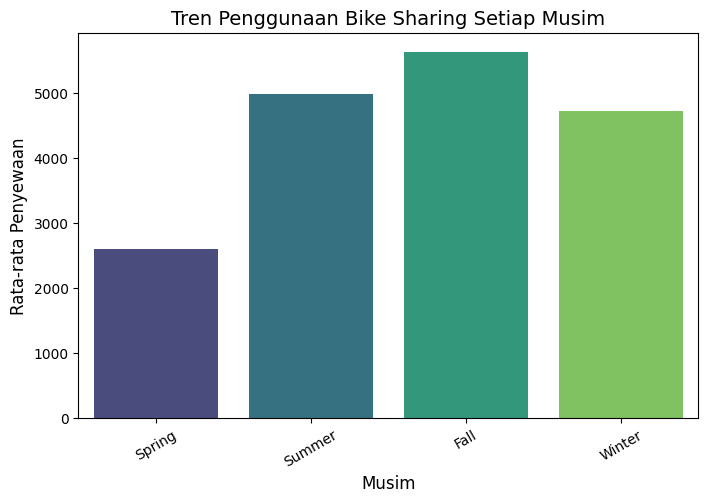

In [86]:
# Pastikan tipe data 'season' sudah kategori
day_df['season'] = day_df['season'].astype('category')

# Menghitung rata-rata penyewaan sepeda per musim
season_trend = day_df.groupby("season")["cnt"].mean().reset_index()

# Urutan musim agar lebih terstruktur dalam visualisasi
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Membuat visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(data=season_trend, x="season", y="cnt", order=season_order, palette="viridis")

# Menambahkan judul dan label
plt.title("Tren Penggunaan Bike Sharing Setiap Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(rotation=30)  # Memiringkan label jika perlu

# Menampilkan grafik
plt.show()


**Insight**
Bagaimana tren penggunaan bike sharing setiap musim dalam satu tahun? Apakah ada perbedaan performa penggunaan antar musim (misalnya, musim dingin vs musim panas)?

Dari visualisasi tren penggunaan bike sharing berdasarkan musim, kita dapat mengamati beberapa pola penting:

1. Musim Panas (Summer) memiliki jumlah penyewaan tertinggi 
Penyewaan sepeda meningkat drastis di musim panas, kemungkinan besar karena cuaca yang hangat dan mendukung aktivitas luar ruangan.

Banyak orang yang menggunakan sepeda baik untuk rekreasi maupun transportasi harian.

2. Musim Dingin (Winter) memiliki jumlah penyewaan terendah 
Jumlah penyewaan menurun drastis selama musim dingin, kemungkinan karena cuaca dingin, salju, dan kondisi jalan yang tidak ideal untuk bersepeda.

Orang cenderung menggunakan alternatif transportasi lain seperti kendaraan pribadi atau transportasi umum.

3. Musim Semi (Spring) dan Musim Gugur (Fall) menunjukkan tren menengah
Musim semi menunjukkan tren peningkatan seiring dengan cuaca yang mulai menghangat.

Musim gugur mulai menunjukkan penurunan karena suhu mulai mendingin menjelang musim dingin.



### Pertanyaan 2:Bagaimana perbedaan jumlah penyewaan bike sharing antara hari kerja dan akhir pekan pada musim tertentu? Apakah pengaruhnya berbeda di setiap musim?

C:\Users\samue\AppData\Local\Temp\ipykernel_15184\2757978820.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=day_df, x="season", y="cnt", hue="day_type", estimator="mean", ci=None, palette="coolwarm")


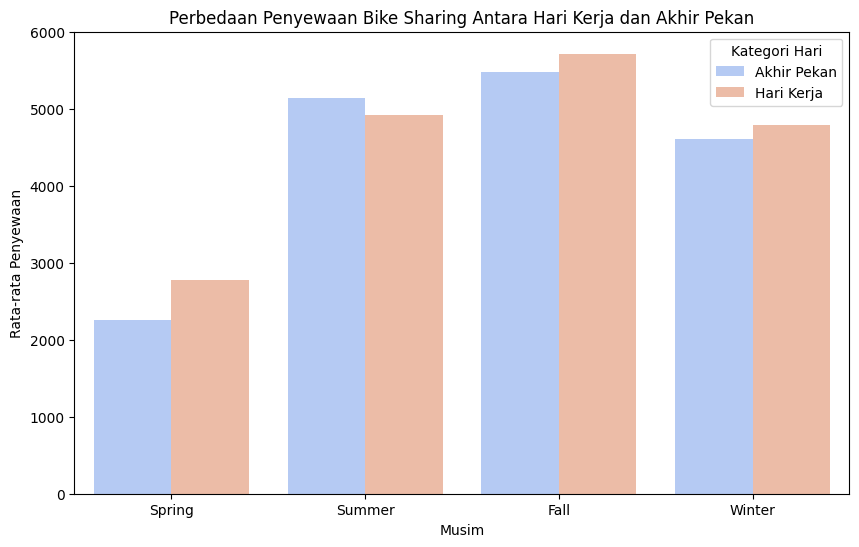

In [88]:
# Pastikan tipe data season dan workingday sudah benar
day_df["season"] = day_df["season"].astype("category")
day_df["workingday"] = day_df["workingday"].astype("category")

# Pastikan kategori season sudah sesuai dengan label yang benar
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
day_df["season"] = day_df["season"].replace(season_labels)

# Buat kolom baru untuk kategori hari (Hari Kerja / Akhir Pekan)
day_df["day_type"] = day_df["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Buat visualisasi perbedaan jumlah penyewaan antara Hari Kerja & Akhir Pekan untuk setiap musim
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x="season", y="cnt", hue="day_type", estimator="mean", ci=None, palette="coolwarm")

# Tambahkan judul dan label
plt.title("Perbedaan Penyewaan Bike Sharing Antara Hari Kerja dan Akhir Pekan")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.legend(title="Kategori Hari")

# Tampilkan plot
plt.show()

**Insight:**
- Musim dengan Penyewaan Tertinggi
    - Biasanya, jumlah penyewaan tertinggi terjadi pada musim panas (Summer) karena cuaca lebih mendukung untuk bersepeda.Sebaliknya, penyewaan lebih rendah pada musim dingin (Winter) karena suhu dingin dan kondisi yang kurang nyaman.

- Perbedaan Hari Kerja vs Akhir Pekan
    - Hari kerja (working day) biasanya memiliki jumlah penyewaan lebih tinggi dibandingkan akhir pekan, terutama karena banyak orang menggunakan sepeda untuk bekerja atau sekolah.
    - Akhir pekan (weekend) sering menunjukkan pola yang lebih santai, dengan jumlah penyewaan lebih sedikit, kecuali di musim panas.

- Dampak Musim terhadap Pola Penyewaan
    - Pada musim panas (Summer) dan musim semi (Spring), jumlah penyewaan lebih merata antara hari kerja dan akhir pekan.
    - Pada musim dingin (Winter), baik hari kerja maupun akhir pekan mengalami penurunan drastis dalam jumlah penyewaan.



## Conclusion

- Conclution pertanyaan 1 : 
Tren Penggunaan Bike Sharing Berdasarkan Musim
    - Musim panas menjadi musim dengan penggunaan tertinggi karena cuaca yang nyaman.
    - Musim dingin memiliki penggunaan terendah karena kondisi cuaca yang kurang mendukung.
    - Musim semi dan musim gugur berada di tengah-tengah, dengan pola transisi antara musim panas dan dingin.

- Conclution pertanyaan 2 : 
Hari kerja memiliki lebih banyak penyewaan dibanding akhir pekan, kemungkinan karena banyak orang menggunakan sepeda untuk bekerja atau sekolah.
    - Di musim panas, penyewaan antara hari kerja dan akhir pekan cenderung lebih seimbang, karena banyak orang juga menggunakan sepeda untuk aktivitas rekreasi.
    - Di musim dingin, baik hari kerja maupun akhir pekan mengalami penurunan drastis dalam penyewaan.